# 📊 Análise de Dados de Imóveis

Este notebook realiza uma análise exploratória de dados de imóveis, incluindo tratamento de dados, visualizações e insights.

## 📥 Importação e Conhecimento da Base de Dados

In [13]:

import pandas as pd
import matplotlib.pyplot as plt

# Carregar a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')

# Exibir as primeiras linhas da base de dados
dados.head()


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


## 📊 Análise Exploratória

Nesta seção, exploramos os principais dados dos imóveis.

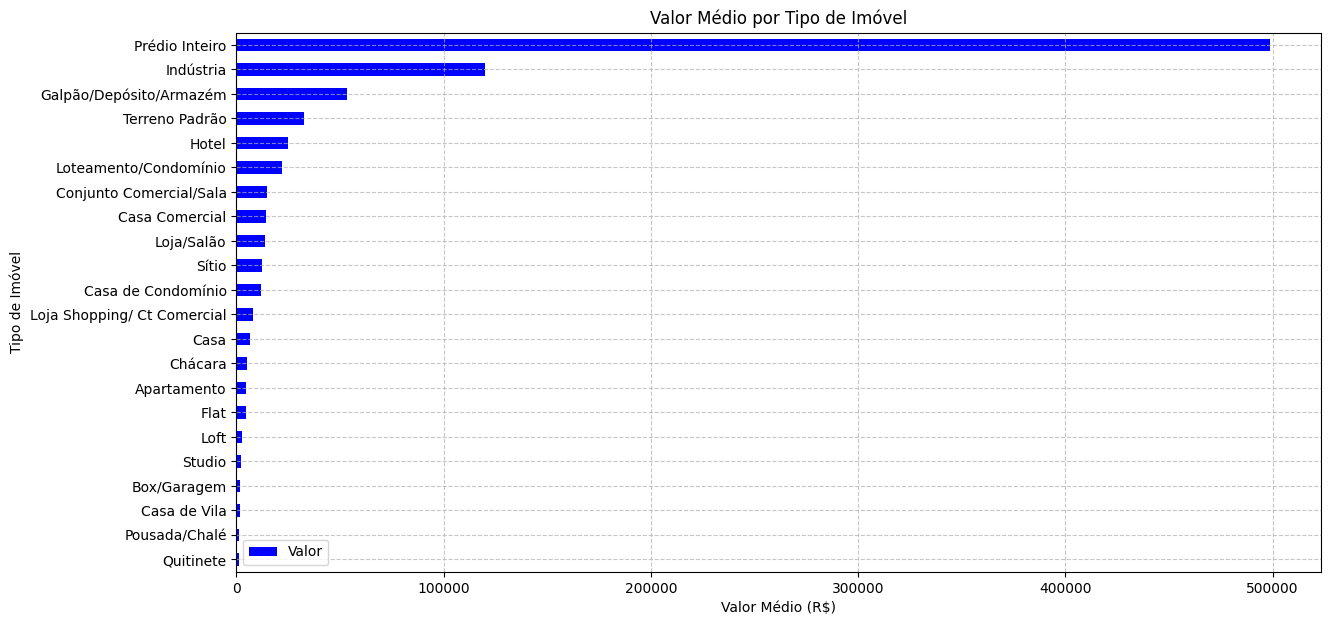

In [14]:

# Agrupar por tipo de imóvel e calcular a média de valores
df_valor_por_imovel = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

# Criar um gráfico de barras para visualizar os valores médios por tipo de imóvel
df_valor_por_imovel.plot(kind='barh', figsize=(14, 7), color='blue')
plt.title('Valor Médio por Tipo de Imóvel')
plt.xlabel('Valor Médio (R$)')
plt.ylabel('Tipo de Imóvel')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## 📌 Filtragem de Dados

Removemos imóveis comerciais para focar apenas em residenciais.

In [15]:

# Lista de imóveis comerciais a serem removidos
list_imoveis_comerciais = [
    'Conjunto Comercial/Sala', 'Prédio Inteiro', 'Loja/Salão',
    'Galpão/Depósito/Armazém', 'Casa Comercial', 'Terreno Padrão',
    'Loja Shopping/ Ct Comercial', 'Box/Garagem', 'Chácara',
    'Loteamento/Condomínio', 'Sítio', 'Pousada/Chalé',
    'Hotel', 'Indústria'
]

# Filtrar apenas imóveis residenciais
df = dados[~dados['Tipo'].isin(list_imoveis_comerciais)]

# Exibir os primeiros dados filtrados
df.head()


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


## 📊 Visualização dos Tipos de Imóveis Residenciais

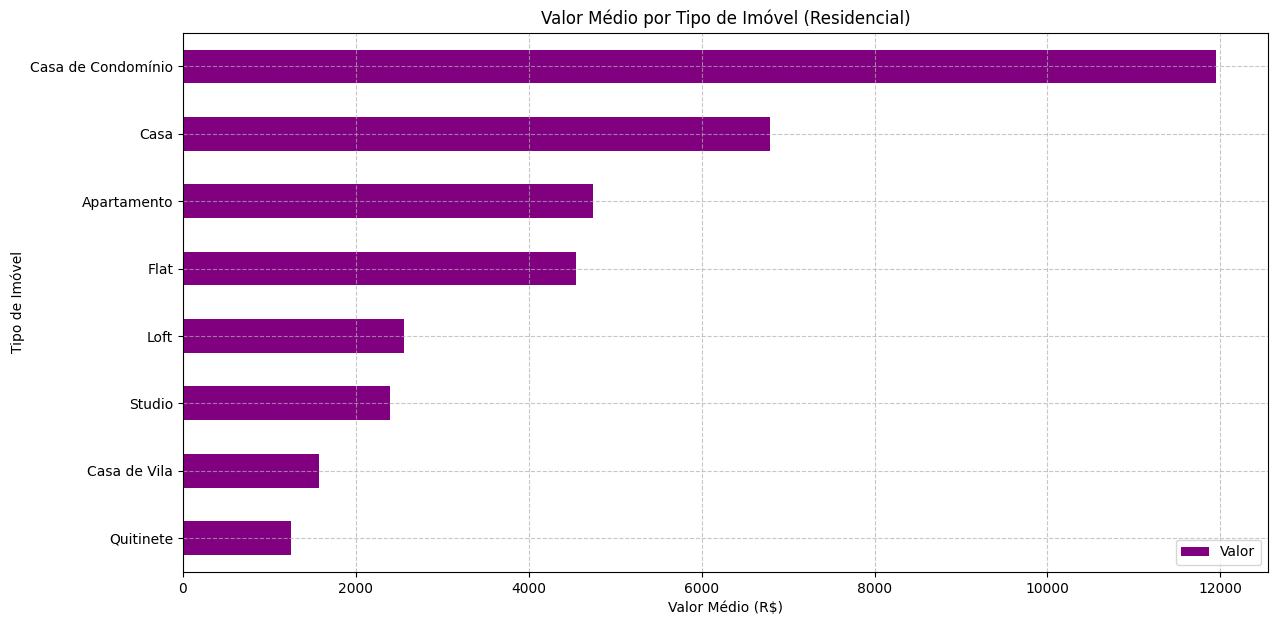

In [16]:

df_valor_por_imovel = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_valor_por_imovel.plot(kind='barh', figsize=(14, 7), color='purple')
plt.title('Valor Médio por Tipo de Imóvel (Residencial)')
plt.xlabel('Valor Médio (R$)')
plt.ylabel('Tipo de Imóvel')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## 🔎 Distribuição dos Tipos de Imóvel

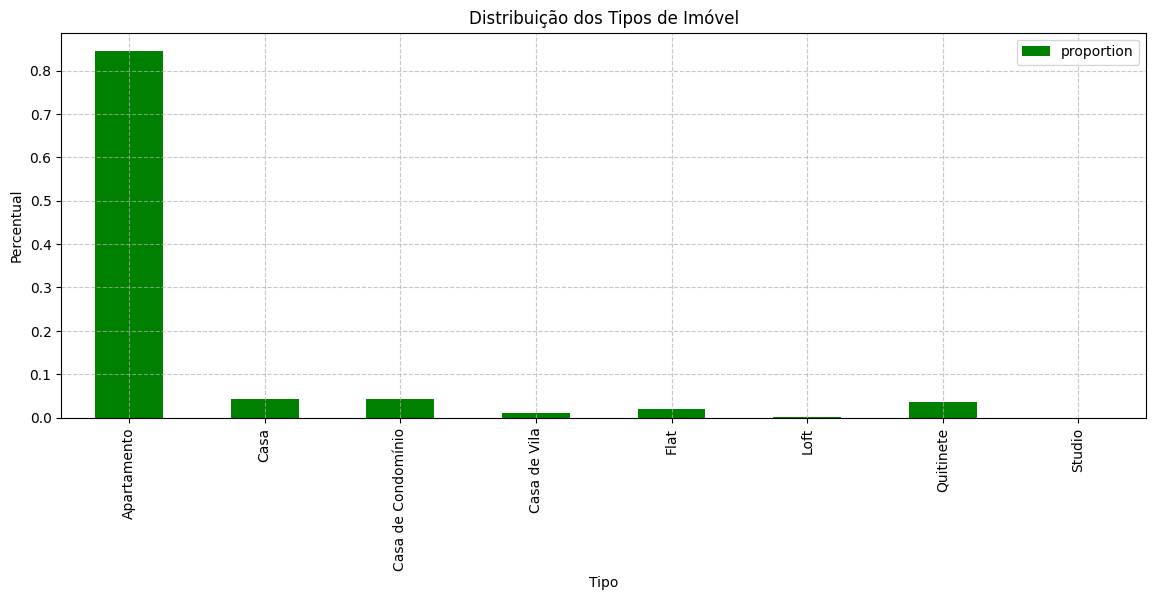

In [17]:

percentual_por_tipo = df['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')
percentual_por_tipo.plot(kind='bar', figsize=(14, 5), color='green')
plt.title('Distribuição dos Tipos de Imóvel')
plt.xlabel('Tipo')
plt.ylabel('Percentual')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## 🔍 Analisando os Apartamentos

In [18]:

df_apartamento = df.query('Tipo == "Apartamento"')

# Média de quartos por apartamento
m_quarto_apartamento = df.groupby('Tipo')[['Quartos']].mean()
m_quarto_apartamento


,Quartos
Tipo,
Apartamento,2.481569
Casa,3.133402
Casa de Condomínio,4.007028
Casa de Vila,1.927711
Flat,1.415966
Loft,1.117647
Quitinete,0.834928
Studio,0.500000


## 🌆 Analisando Bairros

Verificamos quais bairros possuem os aluguéis mais caros.

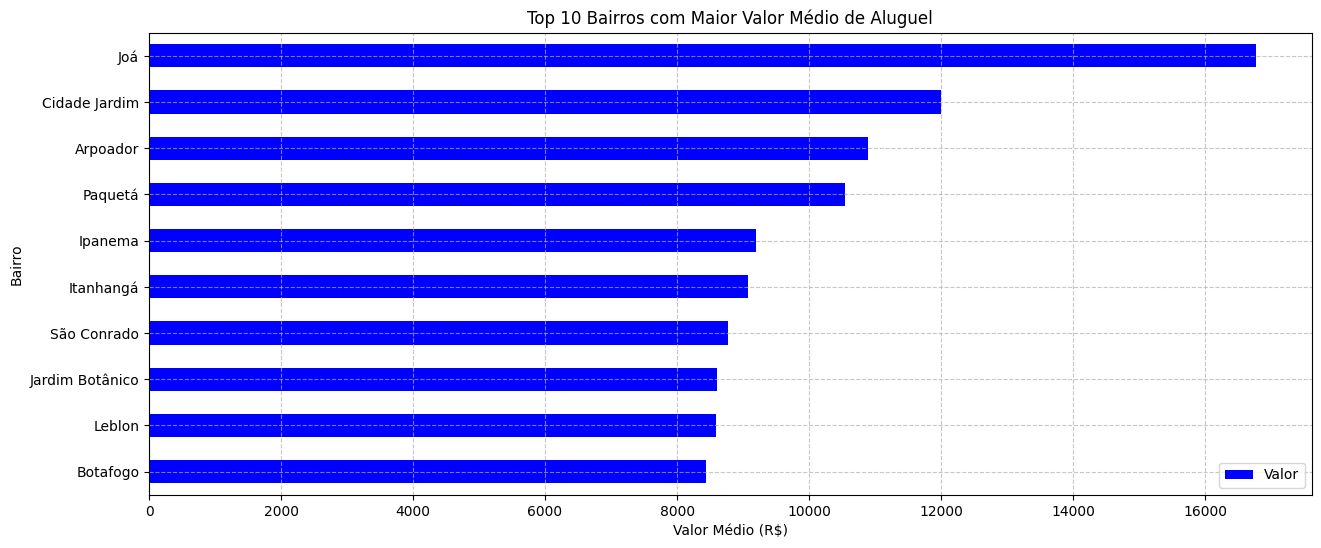

In [19]:

# Top 10 bairros mais caros
bairros_precos = df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False).head(10)
bairros_precos

# gráfico de bairros mais caros
bairros_precos.sort_values(by='Valor', ascending=True).plot(kind='barh', figsize=(15,6), color='blue')
plt.title('Top 10 Bairros com Maior Valor Médio de Aluguel')
plt.xlabel('Valor Médio (R$)')
plt.ylabel('Bairro')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## 🧹 Tratamento de Dados Nulos e Remoção de Outliers

In [20]:

# Identificar e tratar valores nulos
df_apartamento.fillna(0, inplace=True)

# Removendo registros com valores zerados
df_apartamento = df_apartamento[(df_apartamento['Valor'] > 0) & (df_apartamento['Condominio'] > 0)]

# Remover a coluna 'Tipo' pois já filtramos apenas apartamentos
df_apartamento.drop(columns=['Tipo'], inplace=True)


<ipython-input-20-e4cac6098e1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartamento.fillna(0, inplace=True)
<ipython-input-20-e4cac6098e1a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartamento.drop(columns=['Tipo'], inplace=True)


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 📥 Salvando os Dados Tratados

In [22]:

# Salvar arquivos tratados
df_apartamento.to_csv('dados_apartamentos.csv', index=False, sep=';')
print('Dados tratados salvos com sucesso!')


Dados tratados salvos com sucesso!
